In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
import seaborn as sns
import os, glob
from tifffile import imsave
import cv2
import tarfile
import pyproj as proj
from osgeo import gdal
import rasterio
import itertools
import os
import csv
from scipy.interpolate import griddata
#from arcpy import env
from rasterstats import zonal_stats
%matplotlib inline

path = os.getcwd()

In [2]:
path='E:\program'
os.chdir(path)

In [ ]:
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages

base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('POT') #installing POT package

In [221]:
from scipy.stats import invweibull #frechet
import matplotlib.pyplot as plt

In [222]:
invweibull.stats?

Signature: invweibull.stats(*args, **kwds)
Docstring:
Some statistics of the given RV.

Parameters
----------
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional (continuous RVs only)
    scale parameter (default=1)
moments : str, optional
    composed of letters ['mvsk'] defining which moments to compute:
    'm' = mean,
    'v' = variance,
    's' = (Fisher's) skew,
    'k' = (Fisher's) kurtosis.
    (default is 'mv')

Returns
-------
stats : sequence
    of requested moments.
File:      c:\users\quint\anaconda3\envs\gds\envs\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method


In [218]:
df_subb_577

[169.03,
 186.95,
 134.39,
 144.81,
 236.42,
 213.1,
 207.27,
 300.41,
 215.11,
 178.67,
 247.17,
 154.55,
 114.77,
 239.86,
 281.47,
 290.02,
 119.95,
 114.01,
 218.37,
 142.75,
 139.92,
 134.49,
 192.54,
 193.97,
 79.19,
 181.6,
 239.8,
 100.81,
 195.21,
 229.09,
 188.54,
 213.39,
 291.9,
 235.01,
 163.28,
 140.5,
 338.14,
 177.5,
 104.59,
 302.2,
 293.08,
 159.33,
 275.67,
 274.88,
 203.42,
 241.98,
 274.71,
 113.86,
 221.88,
 324.5,
 129.44,
 170.06,
 404.46,
 165.69,
 225.73,
 238.05,
 258.83,
 327.67,
 171.58,
 223.19,
 267.92,
 224.23,
 359.38,
 346.26,
 345.49,
 192.78,
 137.33,
 349.3,
 321.38,
 104.85,
 296.78,
 142.05,
 253.36,
 267.21,
 385.01,
 186.0,
 365.88,
 219.3,
 175.57,
 227.61,
 326.45,
 208.95,
 292.85,
 223.4,
 268.06,
 264.8]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_m, alpha = 1, 3.
#drawing samples from distribution
samples = (np.random.pareto(alpha, 1000) + 1) * x_m
count, bins, _ = plt.hist(samples, 100, normed=True)
fit = alpha*x_m**alpha / bins**(alpha+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.xlabel('bins', fontsize=15)
plt.ylabel('probability density', fontsize=15)
plt.title('Probability Density Function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [223]:
invweibull.stats(sorted(df_subb_577),moments='mvsk')

(array([1.00744857, 1.005824  , 1.00561006, 1.00559592, 1.00514643,
        1.00513956, 1.00510502, 1.00488141, 1.00451878, 1.00435022,
        1.00434694, 1.00425593, 1.00417618, 1.00415873, 1.0041128 ,
        1.00409239, 1.00403349, 1.00377647, 1.00366195, 1.00357244,
        1.00351994, 1.00344968, 1.00342857, 1.0033979 , 1.00331992,
        1.00328347, 1.00326177, 1.00320864, 1.00313204, 1.00311598,
        1.00308946, 1.00302471, 1.00302091, 1.00300221, 1.00298297,
        1.00286157, 1.00280797, 1.00278521, 1.00273054, 1.00272679,
        1.00270482, 1.00266412, 1.00265273, 1.00262165, 1.00260614,
        1.00260368, 1.00259396, 1.0025766 , 1.00255515, 1.00253852,
        1.00247411, 1.00245925, 1.00244229, 1.00242434, 1.00242373,
        1.00240234, 1.00235155, 1.00229371, 1.00224491, 1.00219397,
        1.00217406, 1.00216826, 1.00216712, 1.00211433, 1.00211302,
        1.00210692, 1.00206324, 1.00200206, 1.00198909, 1.0019826 ,
        1.00198103, 1.00195619, 1.00193242, 1.00

In [ ]:
weibull_min.pdf()

In [ ]:
ax.plot(x, weibull_min.pdf(x, c),'r-', lw=5, alpha=0.6, label='frechet_r pdf')

In [187]:
import skextremes as ske
import matplotlib.pyplot as plt


c:\users\quint\scikit-extremes\skextremes\datasets\datasets.py:40: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  raise ValueError(('The number of fields is not equal to')


In [323]:
ske.models

Type:        module
String form: <module 'skextremes.models' from 'c:\\users\\quint\\scikit-extremes\\skextremes\\models\\__init__.py'>
File:        c:\users\quint\scikit-extremes\skextremes\models\__init__.py
Docstring:   <no docstring>


In [197]:
model=ske.models.classic.GEV(df_subb_577, fit_method = 'mle', ci = 0.05,
ci_method = 'delta')
model.params


c:\users\quint\scikit-extremes\skextremes\models\classic.py:527: RuntimeWarning: divide by zero encountered in log
  sT = -_np.log(1.-self.frec/T)
c:\users\quint\scikit-extremes\skextremes\models\classic.py:527: RuntimeWarning: invalid value encountered in log
  sT = -_np.log(1.-self.frec/T)
c:\users\quint\scikit-extremes\skextremes\models\classic.py:546: RuntimeWarning: invalid value encountered in double_scalars
  gradZ = [scale * (c**-2) * (1 - sT[i] ** (-c)) - scale * (c**-1) * (sT[i]**-c) * _np.log(sT[i]),


OrderedDict([('shape', 0.19219081852292055),
             ('location', 194.0895794874505),
             ('scale', 69.03753534131909)])

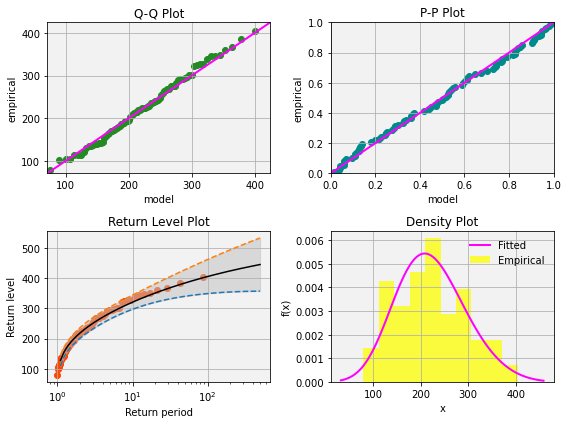

In [198]:
model.plot_summary()
plt.show()


In [7]:
import lmoments3 as lm
from lmoments3 import distr

for i in range(218,220):
    input_Folder=r'CMIP\model_mean_585_single_2'
    file=os.listdir(input_Folder)[i]
    if file.endswith('tif'):
        file_path=os.path.join(input_Folder, file)
        with rasterio.open(file_path) as src:
            affine = src.transform
            array = src.read(1)

In [4]:
inputFolder=r'CMIP\model_1_370_max'
df_subb_577=[]
for file in  os.listdir(inputFolder):
    file_path1=os.path.join(inputFolder, file)
    df1 = pd.read_csv(file_path1,index_col='name')
    df_subb_577.append(df1['rainfall'][0])

In [45]:
sorted(df_subb_577)

[79.19,
 100.81,
 104.59,
 104.85,
 113.86,
 114.01,
 114.77,
 119.95,
 129.44,
 134.39,
 134.49,
 137.33,
 139.92,
 140.5,
 142.05,
 142.75,
 144.81,
 154.55,
 159.33,
 163.28,
 165.69,
 169.03,
 170.06,
 171.58,
 175.57,
 177.5,
 178.67,
 181.6,
 186.0,
 186.95,
 188.54,
 192.54,
 192.78,
 193.97,
 195.21,
 203.42,
 207.27,
 208.95,
 213.1,
 213.39,
 215.11,
 218.37,
 219.3,
 221.88,
 223.19,
 223.4,
 224.23,
 225.73,
 227.61,
 229.09,
 235.01,
 236.42,
 238.05,
 239.8,
 239.86,
 241.98,
 247.17,
 253.36,
 258.83,
 264.8,
 267.21,
 267.92,
 268.06,
 274.71,
 274.88,
 275.67,
 281.47,
 290.02,
 291.9,
 292.85,
 293.08,
 296.78,
 300.41,
 302.2,
 321.38,
 324.5,
 326.45,
 327.67,
 338.14,
 345.49,
 346.26,
 349.3,
 359.38,
 365.88,
 385.01,
 404.46]

In [155]:
the_moments = lm.lmom_ratios(sorted(df_subb_577), 4)
pars = distr.gev.lmom_fit(sorted(df_subb_577), lmom_ratios=the_moments)
pars

OrderedDict([('c', 0.1728265846284412),
             ('loc', 192.87098656237524),
             ('scale', 70.84259506818165)])

In [153]:
paras={'loc':pars['loc'],'scale':pars['scale'],'c':pars['c']}

In [160]:
from lmoments3 import stats, distr
stats.AIC(df_subb_577, 'wei', paras)
#stats.BIC(sorted(df_subb_577), 'wei', paras)

inf

In [214]:
distr.gev.lmom_fit?

Signature: distr.gev.lmom_fit(data=[], lmom_ratios=[])
Docstring:
Fit the distribution function to the given data or given L-moments.

:param data: Data to use in calculating the distribution parameters
:type data: array_like
:param lmom_ratios: L-moments (ratios) l1, l2, t3, t4, .. to use in calculating the distribution parameters
:type lmom_ratios: array_like
:returns: Distribution parameters in `scipy` order, e.g. scale, loc, shape
:rtype: :class:`OrderedDict`
File:      c:\users\quint\anaconda3\envs\gds\envs\myenv\lib\site-packages\lmoments3\distr.py
Type:      method


In [228]:
x = np.linspace(100,900,100)
y=genextreme.pdf(x,0.1728, 192.8709,70.8426) #c>0 naar links
y2=genextreme.pdf(x,-0.1728, 192.8709,70.8426) #c<0 naar rechts
y3=genextreme.pdf(x,0, 192.8709,70.8426) #c=0 exponential decay

(array([ 4., 12.,  9., 13., 17.,  8., 11.,  5.,  5.,  2.]),
 array([ 79.19 , 111.717, 144.244, 176.771, 209.298, 241.825, 274.352,
        306.879, 339.406, 371.933, 404.46 ]),
 <BarContainer object of 10 artists>)

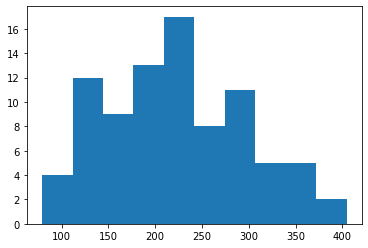

In [229]:
plt.hist(df_subb_577)

In [230]:
0.99==genextreme.cdf(x,-0.1728, 192.8709,70.8426)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

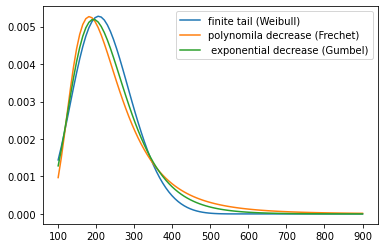

In [231]:
plt.plot(x, y, label='finite tail (Weibull)') #c>0->type 3: finite tail (Weibull)
plt.plot(x, y2, label='polynomila decrease (Frechet)') #c<0->type 2: polynomila decrease (Frechet)
plt.plot(x, y3, label=' exponential decrease (Gumbel)') #c=0->type 1: exponential decrease (Gumbel)
plt.legend(loc="upper right")

In [312]:
genextreme.cdf(420,0.1728, 192.8709,70.8426)

0.9906980941272617

In [322]:
genextreme.cdf(700,-0.1728, 192.8709,70.8426)

0.9905719735931989

In [98]:
genextreme.cdf(x,-0.1728, 192.8709,70.8426)

array([0.00143131, 0.01281835, 0.0170976 , 0.0174252 , 0.03168303,
       0.03197075, 0.03345497, 0.04476715, 0.07099304, 0.087446  ,
       0.0877972 , 0.0980714 , 0.10793227, 0.11020243, 0.116377  ,
       0.1192159 , 0.12774629, 0.1712607 , 0.19421753, 0.21380088,
       0.22597242, 0.24306801, 0.24838483, 0.25626346, 0.27709145,
       0.28722085, 0.29337258, 0.30879811, 0.3319558 , 0.33694586,
       0.34528427, 0.36616042, 0.36740735, 0.37357911, 0.37998949,
       0.42177974, 0.44090685, 0.4491449 , 0.469191  , 0.47057499,
       0.47873669, 0.49398056, 0.49827376, 0.51005156, 0.51595611,
       0.51689784, 0.52060688, 0.52725677, 0.53549369, 0.54190093,
       0.56684067, 0.57261652, 0.57921431, 0.58620306, 0.58644094,
       0.59477164, 0.61455818, 0.63703552, 0.65589757, 0.67543603,
       0.68302036, 0.68522205, 0.68565444, 0.70554051, 0.70603237,
       0.70830744, 0.7244836 , 0.74669967, 0.75133488, 0.75364396,
       0.75419968, 0.76296393, 0.77124808, 0.77522154, 0.81350

In [90]:
genextreme.pdf(x,0.1728, 192.8709,70.8426)

array([0.00383922, 0.00397846, 0.00411299, 0.00424223, 0.00436564,
       0.00448268, 0.00459289, 0.00469583, 0.00479113, 0.00487845,
       0.00495751, 0.00502806, 0.00508994, 0.00514299, 0.00518716,
       0.00522239, 0.00524871, 0.00526617, 0.00527488, 0.00527498,
       0.00526665, 0.0052501 , 0.00522558, 0.00519338, 0.00515379,
       0.00510713, 0.00505376, 0.00499403, 0.00492831, 0.004857  ,
       0.00478047, 0.00469914, 0.00461339, 0.00452363, 0.00443024,
       0.00433363, 0.00423417, 0.00413225, 0.00402823, 0.00392246,
       0.00381529, 0.00370705, 0.00359806, 0.00348862, 0.00337902,
       0.00326953, 0.0031604 , 0.00305187, 0.00294417, 0.00283751,
       0.00273208, 0.00262805, 0.00252558, 0.00242483, 0.00232592,
       0.00222898, 0.0021341 , 0.00204138, 0.00195089, 0.00186271,
       0.00177689, 0.00169347, 0.0016125 , 0.00153399, 0.00145796,
       0.00138443, 0.00131338, 0.00124483, 0.00117875, 0.00111512,
       0.00105393, 0.00099514, 0.00093871, 0.00088462, 0.00083

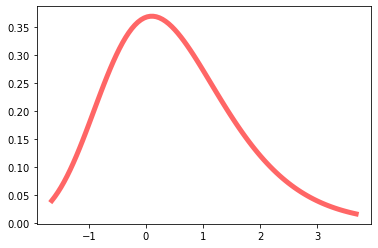

In [66]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 0.1
mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')

x = np.linspace(genextreme.ppf(0.01, c),
                genextreme.ppf(0.99, c), 100)
ax.plot(x, genextreme.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='genextreme pdf')

In [68]:
x

array([-1.6499636 , -1.59605227, -1.54214095, -1.48822962, -1.43431829,
       -1.38040697, -1.32649564, -1.27258431, -1.21867299, -1.16476166,
       -1.11085033, -1.05693901, -1.00302768, -0.94911635, -0.89520503,
       -0.8412937 , -0.78738237, -0.73347105, -0.67955972, -0.62564839,
       -0.57173707, -0.51782574, -0.46391441, -0.41000308, -0.35609176,
       -0.30218043, -0.2482691 , -0.19435778, -0.14044645, -0.08653512,
       -0.0326238 ,  0.02128753,  0.07519886,  0.12911018,  0.18302151,
        0.23693284,  0.29084416,  0.34475549,  0.39866682,  0.45257814,
        0.50648947,  0.5604008 ,  0.61431212,  0.66822345,  0.72213478,
        0.7760461 ,  0.82995743,  0.88386876,  0.93778008,  0.99169141,
        1.04560274,  1.09951406,  1.15342539,  1.20733672,  1.26124804,
        1.31515937,  1.3690707 ,  1.42298202,  1.47689335,  1.53080468,
        1.58471601,  1.63862733,  1.69253866,  1.74644999,  1.80036131,
        1.85427264,  1.90818397,  1.96209529,  2.01600662,  2.06

In [52]:
a=GeneralizedExtremeValue(mu=192.87098656237524 sigma=70.84259506818165, xi=0.1728265846284412)

SyntaxError: invalid syntax (<ipython-input-52-3d7736ac36e2>, line 1)

In [44]:
myDistribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sorted(df_subb_577))

TypeError: InvalidArgumentException : Error: cannot build a GeneralizedExtremeValue distribution from the given parameters

In [50]:
myDistribution

class=GeneralizedExtremeValue name=GeneralizedExtremeValue mu=194.089 sigma=69.0374 xi=-0.192189 actual distribution=class=WeibullMax name=WeibullMax dimension=1 beta=359.215 alpha=5.2032 gamma=553.305

mhu=location, sigma=scale, xi=shape

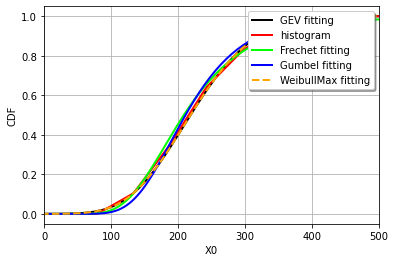

In [40]:
import openturns.viewer as viewer
sample = ot.Sample([[p] for p in df_subb_577])
graph = myDistribution.drawCDF()
graph.add(ot.HistogramFactory().build(sample).drawCDF())

distFrechet = ot.FrechetFactory().buildAsFrechet(sample)
graph.add(distFrechet.drawCDF())

distGumbel = ot.GumbelFactory().buildAsGumbel(sample)
graph.add(distGumbel.drawCDF())

# We change the line style of the WeibullMax.
distWeibullMax = ot.WeibullMaxFactory().buildAsWeibullMax(sample)
curveWeibullMax = distWeibullMax.drawCDF().getDrawable(0)
curveWeibullMax.setLineStyle("dashed")
graph.add(curveWeibullMax)

graph.setColors(["black", "red", "green", "blue", "orange"])
graph.setLegends(
    [
        "GEV fitting",
        "histogram",
        "Frechet fitting",
        "Gumbel fitting",
        "WeibullMax fitting",
    ]
)
graph.setLegendPosition("topright")
view = viewer.View(graph)
axes = view.getAxes()  # axes is a matplotlib object
_ = axes[0].set_xlim(0, 500)

In [48]:
distWeibullMax

class=WeibullMax name=WeibullMax dimension=1 beta=359.215 alpha=5.2032 gamma=553.305

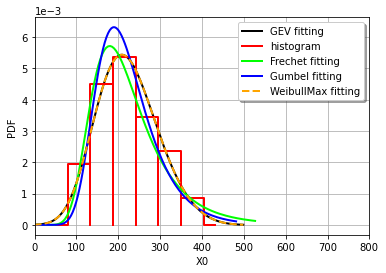

In [239]:
import openturns.viewer as viewer
sample = ot.Sample([[p] for p in df_subb_577])
graph = myDistribution.drawPDF()
graph.add(ot.HistogramFactory().build(sample).drawPDF())

distFrechet = ot.FrechetFactory().buildAsFrechet(sample)
graph.add(distFrechet.drawPDF())

distGumbel = ot.GumbelFactory().buildAsGumbel(sample)
graph.add(distGumbel.drawPDF())

# We change the line style of the WeibullMax.
distWeibullMax = ot.WeibullMaxFactory().buildAsWeibullMax(sample)
curveWeibullMax = distWeibullMax.drawPDF().getDrawable(0)
curveWeibullMax.setLineStyle("dashed")
graph.add(curveWeibullMax)

graph.setColors(["black", "red", "green", "blue", "orange"])
graph.setLegends(
    [
        "GEV fitting",
        "histogram",
        "Frechet fitting",
        "Gumbel fitting",
        "WeibullMax fitting",
    ]
)
graph.setLegendPosition("topright")
view = viewer.View(graph)
axes = view.getAxes()  # axes is a matplotlib object
_ = axes[0].set_xlim(0, 800)

In [240]:
distFrechet

class=Frechet name=Frechet dimension=1 beta=822.415 alpha=12.7349 gamma=-638

In [305]:
b=822.415
a=12.7349
g=-638.00
y=0.99

In [287]:
from sympy.solvers import solve
from sympy import Symbol,Eq

x = Symbol('x')
equation_1 = Eq(np.exp(-((x-(-638.00))/(822.415))**(-(12.7349))), 0.9)

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable exp method

In [279]:
y=np.exp(-((x-g)/b)**(-a))

NameError: name 'q' is not defined

In [299]:
def f(x):
    return np.exp(-((x-g)/b)**(-a))

In [301]:
f(343.3741766734422)

0.9

In [306]:
def f2(y):
    return (-np.log(y))**(-1/a)*(g*(-np.log(y))**(1/a)+b)

In [307]:
f2(0.99)

542.235122478732

In [242]:
distribution=ot.Frechet(822.415,12.7349,-638)

In [275]:
from sympy import symbols,solve
z=symbols('z')
distribution.computeCDF(400)

0.9497344753923569

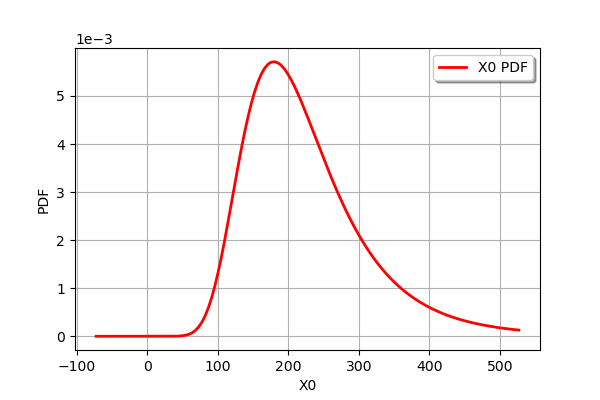

In [302]:
distribution.drawPDF()

In [21]:
import openturns as ot
sample = ot.Sample([[p] for p in df_subb_577])

gev = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
print (gev)
#GeneralizedExtremeValue(mu=12.7497, sigma=3.44903, xi=0.219894) 

GeneralizedExtremeValue(mu=194.089, sigma=69.0374, xi=-0.192189)


In [46]:
the_moments = lm.lmom_ratios(sorted(df_subb_577), 4)
pars = distr.gev.lmom_fit(sorted(df_subb_577), lmom_ratios=the_moments)
pars

OrderedDict([('c', 0.1728265846284412),
             ('loc', 192.87098656237524),
             ('scale', 70.84259506818165)])

In [35]:
fitted_gam = distr.gam(**paras)
median = fitted_gam.ppf(0.5)
median

214.46191487376674

In [14]:
def test_lm():
    x = [360.228515625, 513.506103515625, 273.85031127929688, 340.94839477539062,
         244.13925170898438, 283.414306640625, 394.42819213867188, 284.3604736328125,
         281.26956176757812, 241.46173095703125, 489.75482177734375, 236.31536865234375,
         407.55133056640625, 244.6295166015625, 432.40670776367188, 260.501953125,
         517.23052978515625, 317.6553955078125, 407.61935424804688, 275.0709228515625,
         330.369140625, 285.92086791992188, 247.9954833984375, 344.34811401367188,
         379.55596923828125, 330.80569458007812, 312.35330200195312, 251.79550170898438,
         372.66928100585938, 239.72474670410156]

    #    print(get_initial_params_using_lm(x))
    print(np.mean(x))
    pars = [128.28104749, 578.4927539, 0.62410911]
    data = [588.4747314453125, 693.6640625, 519.03155517578125, 716.58013916015625,
            686.29168701171875, 432.65786743164062, 682.72113037109375, 730.12603759765625,
            698.971923828125, 491.75332641601562, 597.258544921875, 487.13619995117188, 482.33123779296875,
            573.57861328125, 801.67169189453125, 616.41668701171875, 690.954833984375, 671.31646728515625,
            680.87554931640625, 534.18414306640625, 427.86019897460938, 236.22953796386719, 691.40972900390625,
            599.84637451171875,
            545.3563232421875, 553.059814453125, 549.1295166015625, 658.3983154296875, 719.122802734375,
            636.84906005859375]

    import lmoments3
    from lmoments3 import distr

    the_moments = lmoments3.lmom_ratios(sorted(data), 5)
    pars = distr.gev.lmom_fit(sorted(data), lmom_ratios=the_moments)

    print("Fitted params using lmoments: ", pars)
    xi, mu, sigma = pars.values()
    #print(objective_function_stationary_high([sigma, mu, -xi], data))

    print("Fitted using MLE: ", distr.gev.fit(sorted(data)))

    print("Fitted using custom method (Huziy et al 2013), not using l-moments: ", optimize_stationary_for_period(
        np.array(sorted(data))))
    print("Fitted using custom method (Huziy et al 2013), using l-moments: ",
          optimize_stationary_for_period(np.array(sorted(data)), use_lmoments=True))

    from scipy.stats import genextreme

    print("Fitted using scipy.stats.genextreme: ", genextreme.fit(np.array(sorted(data))))
    print("10 year high flow return level: ", get_high_ret_level_stationary([sigma, mu, -xi, 0], 10))
    print("10 year high flow return level: ", get_high_ret_level_stationary([sigma, mu, -0.5, 0], 10))

In [15]:
test_lm()

330.0626948038737
Fitted params using lmoments:  OrderedDict([('c', 0.6241091145977374), ('loc', 578.492753901235), ('scale', 128.28104748545485)])
Fitted using MLE:  (0.5046768411659006, 571.7950320088867, 124.80918704624091)


NameError: name 'optimize_stationary_for_period' is not defined

In [ ]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = -0.1
mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')


x = np.linspace(genextreme.ppf(0.01, c),
                genextreme.ppf(0.99, c), 100)
ax.plot(x, genextreme.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='genextreme pdf')


rv = genextreme(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = genextreme.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], genextreme.cdf(vals, c))

r = genextreme.rvs(c, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

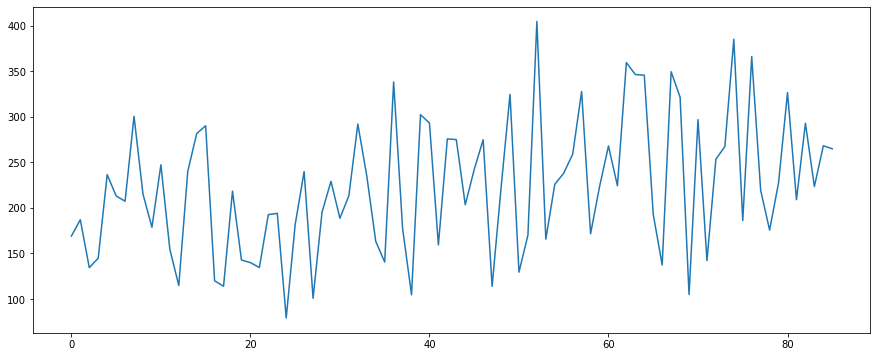

In [38]:
plt.plot(df_subb_577)

In [5]:
LMU = lmoments.samlmu(df_subb_577)

AttributeError: module 'lmoments' has no attribute 'samlmu'

In [9]:
dir(lmoments)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [14]:
lmoments.__package__

'lmoments'